# 微分(Differentiation)

## 範例1. 試繪製一次方函數 f(x)=2𝑥+5
### $\begin{equation}y = 2x + 5\end{equation}$

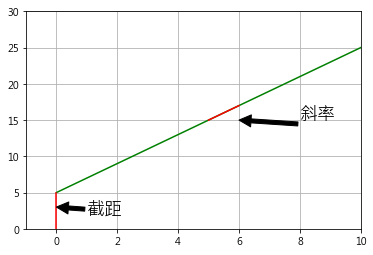

In [2]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 樣本點
x = np.array(range(0, 11))
y = 2 * x + 5

# 作圖
plt.grid()
plt.plot(x, y, color='g')
plt.xlim(-1, 10)
plt.ylim(0, 30)

# 截距 (Intercept)
x = [0, 0]
y = [0, 5]
plt.plot(x, y, color="r")
plt.annotate("截距", xy=(0,3), xytext=(1, 2), xycoords='data', 
             arrowprops=dict(facecolor='black'), fontsize=18)

# 斜率(Slope)
x = np.array([5, 6])
y = 2 * x + 5
plt.plot(x, y, color="r")
plt.annotate("斜率", xy=(6,15), xytext=(8, 15), xycoords='data', 
             arrowprops=dict(facecolor='black'), fontsize=18)

plt.show()

## 微分的定義：取非常相近的兩個點(距離h趨近於0)，求極限(Limits)值。
$\begin{equation}\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}$


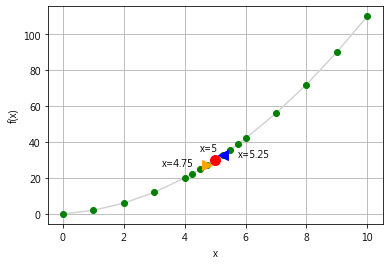

In [3]:
# 連續函數
from matplotlib import pyplot as plt

# 定義 f(x) = 2^x + x
def f(x):
    return x**2 + x

# 取樣本點
x = list(range(0,5))
x.append(4.25)
x.append(4.5)
x.append(4.75)
x.append(5)
x.append(5.25)
x.append(5.5)
x.append(5.75)
x = x + list(range(6,11))

# 對應的 y 值
y = [f(i) for i in x] 

# 設定圖形屬性
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# 畫出函數
plt.plot(x,y, color='lightgrey', marker='o', markeredgecolor='green', markerfacecolor='green')

# 標出 x=5 的點
zx = 5
zy = f(zx)
plt.plot(zx, zy, color='red', marker='o', markersize=10)
plt.annotate('x=' + str(zx),(zx, zy), xytext=(zx - 0.5, zy + 5))

# 標出 x=5.25 的點
posx = 5.25
posy = f(posx)
plt.plot(posx, posy, color='blue', marker='<', markersize=10)
plt.annotate('x=' + str(posx),(posx, posy), xytext=(posx + 0.5, posy - 1))

# 標出 x=4.75 的點
negx = 4.75
negy = f(negx)
plt.plot(negx, negy, color='orange', marker='>', markersize=10)
plt.annotate('x=' + str(negx),(negx, negy), xytext=(negx - 1.5, negy - 1))

plt.show()

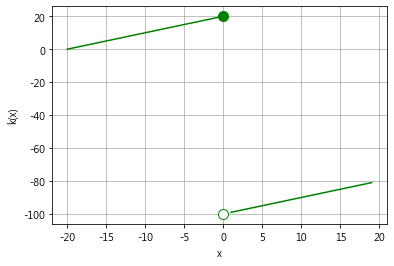

In [4]:
# 不連續函數
from matplotlib import pyplot as plt

def k(x):
    import numpy as np
    if x <= 0:
        return x + 20
    else:
        return x - 100

# 取樣本點
x1 = range(-20, 1)
x2 = range(1, 20)

# 對應的 y 值
y1 = [k(i) for i in x1]
y2 = [k(i) for i in x2]

# 設定圖形屬性
plt.xlabel('x')
plt.ylabel('k(x)')
plt.grid()


# 畫出函數
plt.plot(x1,y1, color='green')
plt.plot(x2,y2, color='green')

# 標出 x=0 斷點
plt.plot(0, k(0), color='green', marker='o', markerfacecolor='green', markersize=10)
plt.plot(0, k(0.0001), color='green', marker='o', markerfacecolor='w', markersize=10)

plt.show()

## SymPy 微分

## 驗證定理

## 常數微分 f(x) = C ==> f'(x) = 0

In [5]:
# 常數微分 f(x) = C ==> f'(x) = 0
from sympy import *

x = Symbol('x')
# f(x) 為常數
y = 0 * x + 5
yprime = y.diff(x)
yprime

0

## f(x) = Cg(x) ==> f'(x) = Cg'(x)

In [6]:
# f(x) = Cg(x) ==> f'(x) = Cg'(x)

from sympy import *

x = Symbol('x')

# Cg(x)
y1 = 5 * x ** 2
yprime1 = y1.diff(x)
print(yprime1)

# g(x)
y2 = x ** 2
# Cg'(x)
yprime2 = 5 * y2.diff(x)
print(yprime2)

# 比較
yprime1 == yprime1

10*x
10*x


True

## 乘積的規則：(d[f(x)g(x)])/dx = f'(x)𝑔(𝑥)+𝑓(𝑥)𝑔'(𝑥)

In [7]:
# (d[f(x)g(x)])/dx = f'(x)𝑔(𝑥)+𝑓(𝑥)𝑔'(𝑥)

from sympy import *

x = Symbol('x')

# d[f(x)g(x)])/dx
f = x ** 2
g = x ** 3
y1 = f*g
yprime1 = y1.diff(x)
print(yprime1)

# f'(x)𝑔(𝑥)+𝑓(𝑥)𝑔'(𝑥)
yprime2 = f.diff(x) * g + f * g.diff(x)
print(yprime2)

# 比較
yprime1 == yprime1

5*x**4
5*x**4


True

## 連鎖律(Chain Rule)

In [8]:
from sympy import *

x = Symbol('x')

# d[f(g(x))])/dx
g = x ** 3
f = g ** 2
yprime1 = f.diff(x)
print(yprime1)

# f'(𝑔(𝑥))𝑔'(𝑥)
g = Symbol('g')
f = g ** 2
g1 = x ** 3
yprime2 = f.diff(g) * g1.diff(x)
# 將 f'(𝑔(𝑥)) 的 g 以 x ** 3 取代
print(yprime2.subs({g:x ** 3}))

# 比較
yprime1 == yprime1

6*x**5
6*x**5


True

## 範例2. 試繪製二次方曲線，求最大值
$\begin{equation}y = -10x^{2} + 100x + 5 \end{equation}$


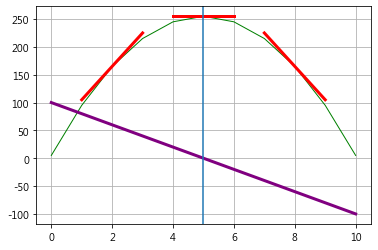

In [21]:
from matplotlib import pyplot as plt

# 二次曲線
def f(x):
    return -10*(x**2) + (100*x)  + 5

# 一階導數
def fd(x):
    return -20*x + 100

# 設定樣本點
x = list(range(0, 11))
y = [f(i) for i in x]

# 一階導數的樣本點
yd = [fd(i) for i in x]

# 畫二次曲線
plt.plot(x,y, color='green', linewidth=1)

# 畫一階導數
plt.plot(x,yd, color='purple', linewidth=3)

# 畫三個點的斜率 x = (2, 5, 8)
x1 = 2
x2 = 5
x3 = 8
plt.plot([x1-1,x1+1],[f(x1)-(fd(x1)),f(x1)+(fd(x1))], color='red', linewidth=3)
plt.plot([x2-1,x2+1],[f(x2)-(fd(x2)),f(x2)+(fd(x2))], color='red', linewidth=3)
plt.plot([x3-1,x3+1],[f(x3)-(fd(x3)),f(x3)+(fd(x3))], color='red', linewidth=3)

# 最大值
plt.axvline(5)

plt.grid()
plt.show()

## 一階導數

In [10]:
from sympy import *

x = Symbol('x')
# f(x)=−10𝑥2 +100𝑥+5
y = -10 * x**2 + 100 * x + 5
yprime = y.diff(x)
yprime

100 - 20*x

## 二階導數

In [11]:
yprime2 = yprime.diff(x)
yprime2

-20

## 利用一階導數=0，求最大值

In [12]:
from sympy.solvers import solve

# 一階導數=0
dict1 = solve([yprime])
print(dict1)
x1 = dict1[x]
print(f'x={x1}, 最大值={-10 * x1**2 + 100 * x1 + 5}')

{x: 5}
x=5, 最大值=255


## 範例3. 試繪製二次方曲線，求最小值
### $\begin{equation}y = x^{2} + 2x + 7 \end{equation}$


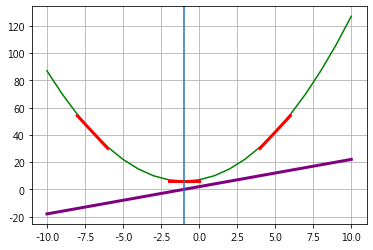

In [13]:
from matplotlib import pyplot as plt

# 二次曲線
def f(x):
    return (x**2) + (2*x) + 7

# 一階導數
def fd(x):
    return 2*x + 2

# 設定樣本點
x = list(range(-10, 11))
y = [f(i) for i in x]

# 一階導數的樣本點
yd = [fd(i) for i in x]

# 畫二次曲線
plt.plot(x,y, color='green')

# 畫一階導數
plt.plot(x,yd, color='purple', linewidth=3)

# 畫三個點的斜率 x = (-7, -1, 5)
x1 = 5
x2 = -1
x3 = -7
plt.plot([x1-1,x1+1],[f(x1)-(fd(x1)),f(x1)+(fd(x1))], color='red', linewidth=3)
plt.plot([x2-1,x2+1],[f(x2)-(fd(x2)),f(x2)+(fd(x2))], color='red', linewidth=3)
plt.plot([x3-1,x3+1],[f(x3)-(fd(x3)),f(x3)+(fd(x3))], color='red', linewidth=3)

# 最大值
plt.axvline(-1)

plt.grid()
plt.show()

## 一階導數

In [14]:
from sympy import *

x = Symbol('x')
# f(x)=𝑥2+2𝑥+7
y = (x**2) + (2*x) + 7
yprime = y.diff(x)
yprime

2*x + 2

## 二階導數

In [15]:
yprime2 = yprime.diff(x)
yprime2

2

## 利用一階導數=0，求最小值

In [16]:
from sympy.solvers import solve

# 一階導數=0
dict1 = solve([yprime])
print(dict1)
x1 = dict1[x]
print(f'x={x1}, 最小值={(x1**2) + (2*x1) + 7}')

{x: -1}
x=-1, 最小值=6


## 範例4. 試繪製三次方曲線，求最小值
### $\begin{equation}f(x) = x^{3} - 2x + 100 \end{equation}$


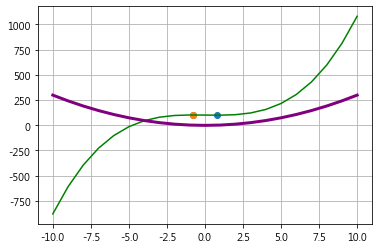

In [17]:
from matplotlib import pyplot as plt
import numpy as np

# f(x)= 𝑥^3−2𝑥+100
def f(x):
    return (x**3) - (2*x) + 100

# 一階導數
def fd(x):
    return 3*(x**2) - 2

# 設定樣本點
x = list(range(-10, 11))
y = [f(i) for i in x]

# 一階導數的樣本點
yd = [fd(i) for i in x]

# 畫二次曲線
plt.plot(x,y, color='green')

# 畫一階導數
plt.plot(x,yd, color='purple', linewidth=3)

# 最小值
x1=np.array([sqrt(6)/3, -sqrt(6)/3])
plt.scatter([x1], [f(x1)])
plt.scatter([-sqrt(6)/3], [f(-1)])

plt.grid()
plt.show()

## 一階導數

In [18]:
from sympy import *

x = Symbol('x')
# f(x)= 𝑥^3−2𝑥+100
y = (x**3) - (2*x) + 100
yprime = y.diff(x)
yprime

3*x**2 - 2

## 二階導數

In [19]:
yprime2 = yprime.diff(x)
yprime2

6*x

## 利用一階導數=0，求最小值

In [20]:
from sympy.solvers import solve

# 一階導數=0
list1 = solve([yprime])
print(list1)
[dict2[x] for dict2 in list1]

[{x: -sqrt(6)/3}, {x: sqrt(6)/3}]


[-sqrt(6)/3, sqrt(6)/3]